In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import os


import numpy as np
import math as mat

%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/proyecto data sciense/Adult_Limpio.csv")

In [ ]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,2,-62374.625,11,9,6,3,1,4,0,0,4356,52.5,38,-1
1,54,2,-62374.625,5,4,0,6,4,4,0,0,3900,32.5,38,-1
2,41,2,-62374.625,15,10,5,9,3,4,0,0,3900,32.5,38,-1
3,34,2,-62374.625,11,9,0,7,4,4,0,0,3770,32.5,38,-1
4,38,2,-62374.625,0,6,5,0,4,4,1,0,3770,32.5,38,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,2,-62374.625,15,10,4,10,1,4,1,0,0,32.5,38,-1
30158,27,2,-62374.625,7,12,2,12,5,4,0,0,0,32.5,38,-1
30159,40,2,-62374.625,11,9,2,6,0,4,1,0,0,32.5,38,1
30160,58,2,-62374.625,11,9,6,0,4,4,0,0,0,32.5,38,-1


# entrenamiento de modelo

In [ ]:
X = data.copy()
X = X.drop(['income'], axis=1)
print(X.shape)

(30162, 14)


In [ ]:
target = data.income

# Transforma 'target' en un array de NumPy y cambia su forma a un array bidimensional
target = target.values.reshape(-1,1)

# Imprime 'target'
print(target)

[[-1]
 [-1]
 [-1]
 ...
 [ 1]
 [-1]
 [-1]]


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.30, random_state=42)

# probar modelos para elegir 2

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define los modelos
models = {
    "logistic": LogisticRegression(),
    "decision_tree": DecisionTreeClassifier(),
    "svm": SVC(),
    "knn": KNeighborsClassifier(),
    "random_forest": RandomForestClassifier(),

}

# Entrena y evalúa cada modelo
for name, model in models.items():
    # Entrena el modelo
    model.fit(X_train, y_train)

    # Realiza predicciones
    predictions = model.predict(X_test)

    # Calcula la precisión del modelo
    accuracy = accuracy_score(y_test, predictions)

    print(f"Modelo: {name}, Precisión: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Modelo: logistic, Precisión: 0.7998673886617306
Modelo: decision_tree, Precisión: 0.8141231075256935
Modelo: svm, Precisión: 0.7851696320035363


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Modelo: knn, Precisión: 0.8388772240026522


<ipython-input-10-0e9704aa5578>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Modelo: random_forest, Precisión: 0.8428555641507349


# Random Forest

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Entrena el modelo de Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Realiza predicciones
predictions_rf = random_forest.predict(X_test)

# Calcula las métricas
precision_rf = precision_score(y_test, predictions_rf)
recall_rf = recall_score(y_test, predictions_rf)
f1_rf = f1_score(y_test, predictions_rf)
accuracy_rf = accuracy_score(y_test, predictions_rf)

# Imprime las métricas
print(f'Precision: {precision_rf}')
print(f'Recall: {recall_rf}')
print(f'F1 Score: {f1_rf}')
print(f'Accuracy: {accuracy_rf}')




<ipython-input-33-7f8a43068051>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Precision: 0.7173699705593719
Recall: 0.6370370370370371
F1 Score: 0.6748211400876991
Accuracy: 0.8442921869819869


# curva roc

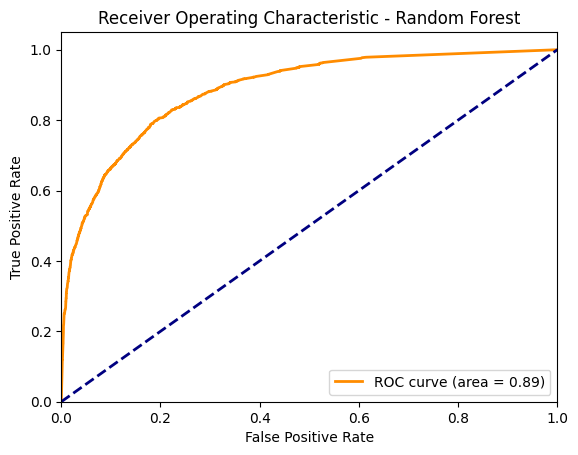

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcula las probabilidades de las clases
probs_rf = random_forest.predict_proba(X_test)

# Calcula la curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf[:,1])

# Calcula el área bajo la curva ROC
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()


randomized para randomForest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define los hiperparámetros que quieres probar
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Crea una instancia de RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=100, cv=5)

# Ajusta RandomizedSearchCV a tus datos de entrenamiento
random_search.fit(X_train, y_train)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros: ", random_search.best_params_)

# Usa el mejor modelo para hacer predicciones
predictions = random_search.predict(X_test)

Mejores hiperparámetros:  {'bootstrap': False, 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 450}

In [ ]:
#aplicando con los mejores parametros lanzados
model_rf=RandomForestClassifier(n_estimators=450, max_depth=9, min_samples_leaf=3, min_samples_split=3, bootstrap=False)

model_rf.fit(X_train, y_train)

predictions=model_rf.predict(X_test)

# Calcula las métricas
precision_rf = precision_score(y_test, predictions)
recall_rf = recall_score(y_test, predictions)
f1_rf = f1_score(y_test, predictions)


# Imprime las métricas
print(f"Random Forest - Precisión: {precision_rf}, Recall: {recall_rf}, F1: {f1_rf}")

<ipython-input-36-2de819296231>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


Random Forest - Precisión: 0.8019354838709677, Recall: 0.5416122004357299, F1: 0.6465539661898569


curva roc nuevamente

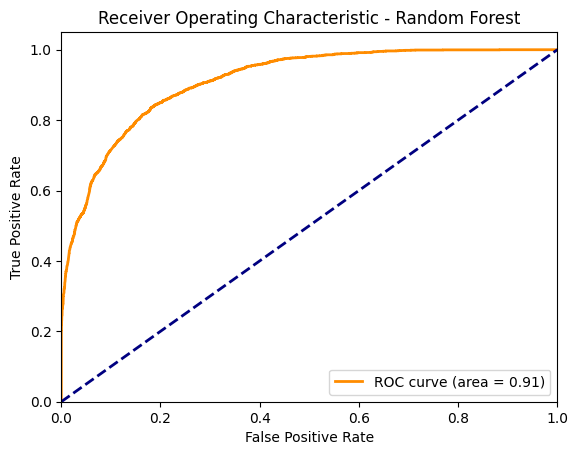

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular las probabilidades de las clases
probs_rf = model_rf.predict_proba(X_test)

# Calcular la curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf[:,1])

# Calcular el área bajo la curva ROC
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

# pruebas de predicciones de reales vs predicciones

In [ ]:
import pandas as pd


y_test_df = pd.DataFrame(y_test)
predictions_df = pd.DataFrame(predictions)


comparison = pd.concat([y_test_df.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)


comparison.columns = ['Real', 'Predicted']

# Muestra las primeras filas del DataFrame
print(comparison.head(5))

   Real  Predicted
0    -1         -1
1    -1         -1
2    -1         -1
3     1         -1
4     1          1


In [ ]:
# Informe de clasificación
cr = classification_report(y_test, predictions)
print('Informe de clasificación:')
print(cr)

Informe de clasificación:
              precision    recall  f1-score   support

          -1       0.86      0.95      0.90      6754
           1       0.80      0.54      0.65      2295

    accuracy                           0.85      9049
   macro avg       0.83      0.75      0.78      9049
weighted avg       0.85      0.85      0.84      9049



# Knn modelo

In [ ]:
# Entrena el modelo de KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Realiza predicciones
predictions_knn = knn.predict(X_test)

# Calcula las métricas
precision_knn = precision_score(y_test, predictions_knn)
recall_knn = recall_score(y_test, predictions_knn)
f1_knn = f1_score(y_test, predictions_knn)
accuracy_knn = accuracy_score(y_test, predictions_knn)


# Imprime las métricas
print(f'Precision: {precision_knn}')
print(f'Recall: {recall_knn}')
print(f'F1 Score: {f1_knn}')
print(f'Accuracy: {accuracy_knn}')


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Precision: 0.7056511056511057
Recall: 0.6257080610021787
F1 Score: 0.6632794457274827
Accuracy: 0.8388772240026522


# curva roc

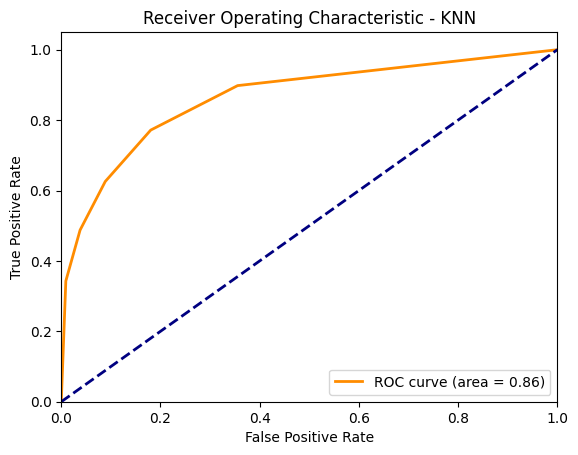

In [ ]:
# Calcula las probabilidades de las clases
probs_knn = knn.predict_proba(X_test)

# Calcula la curva ROC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, probs_knn[:,1])

# Calcula el área bajo la curva ROC
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.show()

# randomized para knn

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define los hiperparámetros que quieres probar
param_dist = {
    'n_neighbors': randint(1, 50),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': randint(1, 2)
}

# CreaR una instancia de RandomizedSearchCV
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist, n_iter=100, cv=5)

# AjustaR RandomizedSearchCV a tus datos de entrenamiento
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros: ", random_search.best_params_)

# Usar el mejor modelo para hacer predicciones
predictions = random_search.predict(X_test)

Mejores hiperparámetros:  {'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


model_knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10, p=1, weights='uniform')


model_knn.fit(X_train, y_train)


predictions_knn = model_knn.predict(X_test)


precision_knn = precision_score(y_test, predictions_knn)
recall_knn = recall_score(y_test, predictions_knn)
f1_knn = f1_score(y_test, predictions_knn)
accuracy_knn = accuracy_score(y_test, predictions_knn)


# Imprime las métricas
print(f'Precision: {precision_knn}')
print(f'Recall: {recall_knn}')
print(f'F1 Score: {f1_knn}')
print(f'Accuracy: {accuracy_knn}')

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Precision: 0.76702307259426
Recall: 0.5938997821350762
F1 Score: 0.6694499017681728
Accuracy: 0.8512542822411316


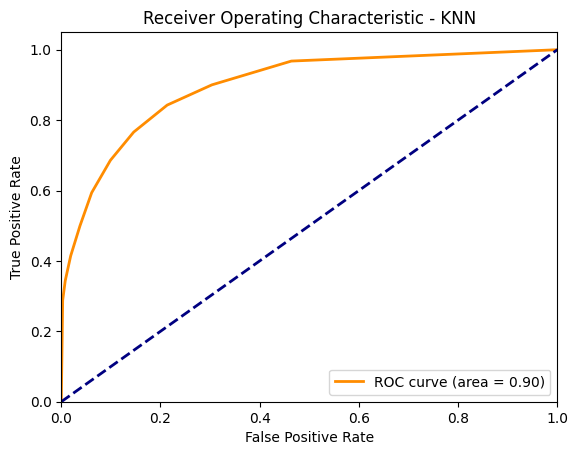

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


probs_knn = model_knn.predict_proba(X_test)


fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, probs_knn[:,1])


roc_auc_knn = auc(fpr_knn, tpr_knn)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.show()

evaluacion

In [ ]:
import pandas as pd

# Realiza predicciones con KNN
predictions_knn = knn.predict(X_test)

# Crea DataFrames para las etiquetas reales y las predichas
y_test_df_knn = pd.DataFrame(y_test)
predictions_df_knn = pd.DataFrame(predictions_knn)

# Concatena los DataFrames
comparison_knn = pd.concat([y_test_df_knn.reset_index(drop=True), predictions_df_knn.reset_index(drop=True)], axis=1)

# Asigna nombres a las columnas
comparison_knn.columns = ['Real', 'Predicted_KNN']

# Muestra las primeras filas del DataFrame
print(comparison_knn.head(3))


   Real  Predicted_KNN
0    -1             -1
1    -1             -1
2    -1             -1


In [ ]:
from sklearn.metrics import classification_report

# Informe de clasificación para Random Forest
cr_rf = classification_report(y_test, predictions_rf)
print('Informe de clasificación para Random Forest:')
print(cr_rf)


Informe de clasificación para Random Forest:
              precision    recall  f1-score   support

          -1       0.88      0.91      0.90      6754
           1       0.72      0.64      0.67      2295

    accuracy                           0.84      9049
   macro avg       0.80      0.78      0.79      9049
weighted avg       0.84      0.84      0.84      9049

